<a href="https://colab.research.google.com/github/valeriafigueredo-data/modelos_descritivos/blob/main/4.Hands_On_4_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Modelos descritivos**


Professor: Matheus Soares de Lacerda

Sala: 01

Alunos:

* Arthur Wanderley Ferreira dos Santos (awfs@cesar.school)
* André Felipe Bezerra de Souza Leão (afbsl@cesar.school)
* Manuela de Lacerda Bezerra Carvalho (mlbc@cesar.school)
* Valéria Cristina Andrade Rodrigues de Figueredo (vcarf@cesar.school)
* Thiago Wanderley Amorim (twa@cesar.school)

O objetivo do presente trabalho é realizar clusterização utilizando o algoritmo K-Means em um conjunto de dados de clientes. Os clientes serão segmentados em grupos com base em seu gênero, idade, renda anual e pontuação de gastos.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/devjaynemorais/modelos_descritivos_curso/main/Aula%2002/dados/mall_customers.csv')

##Análise exploratória

In [ ]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

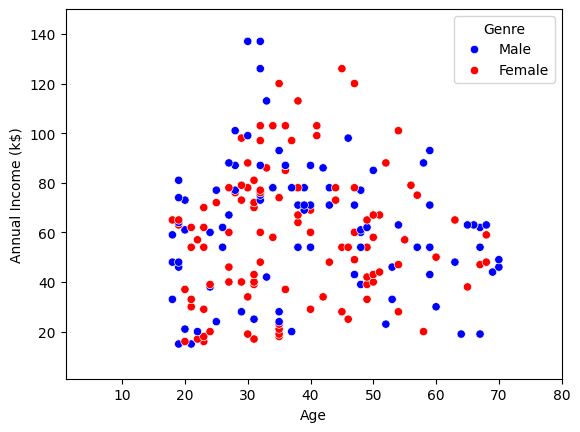

In [ ]:
palette = {'Female': 'red', 'Male': 'blue'}

ax = sns.scatterplot(x='Age', y='Annual Income (k$)', hue='Genre', data=df, palette=palette)

ax.set_xlim(1, 80)
ax.set_ylim(1, 150)
ax

##Kmeans

In [ ]:
scaler = StandardScaler()
print(scaler.fit(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values))
print(scaler.mean_)
print(scaler.transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values))

df[['age_std', 'income_std', 'score_std']] = scaler.transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values)
features = ['age_std', 'income_std', 'score_std']

StandardScaler()
[38.85 60.56 50.2 ]
[[-1.42456879 -1.73899919 -0.43480148]
 [-1.28103541 -1.73899919  1.19570407]
 [-1.3528021  -1.70082976 -1.71591298]
 [-1.13750203 -1.70082976  1.04041783]
 [-0.56336851 -1.66266033 -0.39597992]
 [-1.20926872 -1.66266033  1.00159627]
 [-0.27630176 -1.62449091 -1.71591298]
 [-1.13750203 -1.62449091  1.70038436]
 [ 1.80493225 -1.58632148 -1.83237767]
 [-0.6351352  -1.58632148  0.84631002]
 [ 2.02023231 -1.58632148 -1.4053405 ]
 [-0.27630176 -1.58632148  1.89449216]
 [ 1.37433211 -1.54815205 -1.36651894]
 [-1.06573534 -1.54815205  1.04041783]
 [-0.13276838 -1.54815205 -1.44416206]
 [-1.20926872 -1.54815205  1.11806095]
 [-0.27630176 -1.50998262 -0.59008772]
 [-1.3528021  -1.50998262  0.61338066]
 [ 0.94373197 -1.43364376 -0.82301709]
 [-0.27630176 -1.43364376  1.8556706 ]
 [-0.27630176 -1.39547433 -0.59008772]
 [-0.99396865 -1.39547433  0.88513158]
 [ 0.51313183 -1.3573049  -1.75473454]
 [-0.56336851 -1.3573049   0.88513158]
 [ 1.08726535 -1.24279661 -

In [ ]:
inertia = []
for k in range(1, 13):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df[features])
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

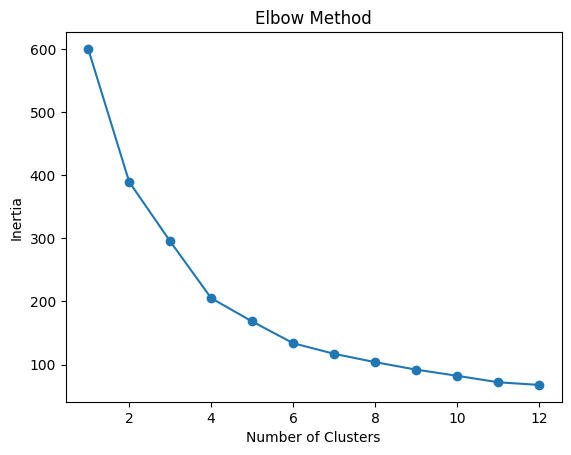

In [ ]:
plt.plot(range(1, 13), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

###Age e Annual Income (k$)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


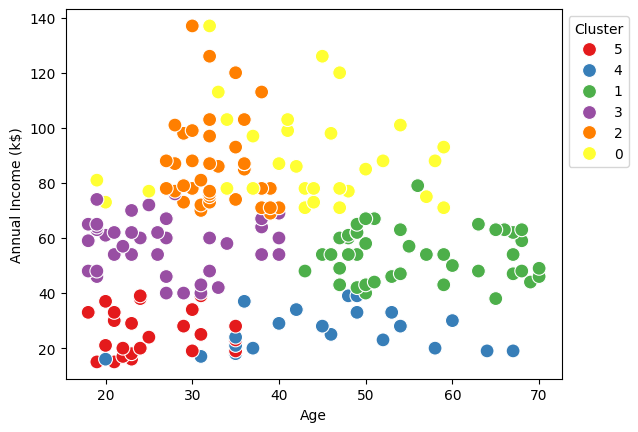

In [ ]:
# Apply K-Means with the current value of k
kmeans = KMeans(n_clusters=6, random_state=0)
df['Cluster'] = kmeans.fit_predict(df[features])
df['Cluster'] = df['Cluster'].astype(str)

# Scatter plot of data points with cluster coloring
ax = sns.scatterplot(data=df, s=100, x='Age', y='Annual Income (k$)', hue='Cluster', palette='Set1')

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [ ]:
kmeans

KMeans(n_clusters=6, random_state=0)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

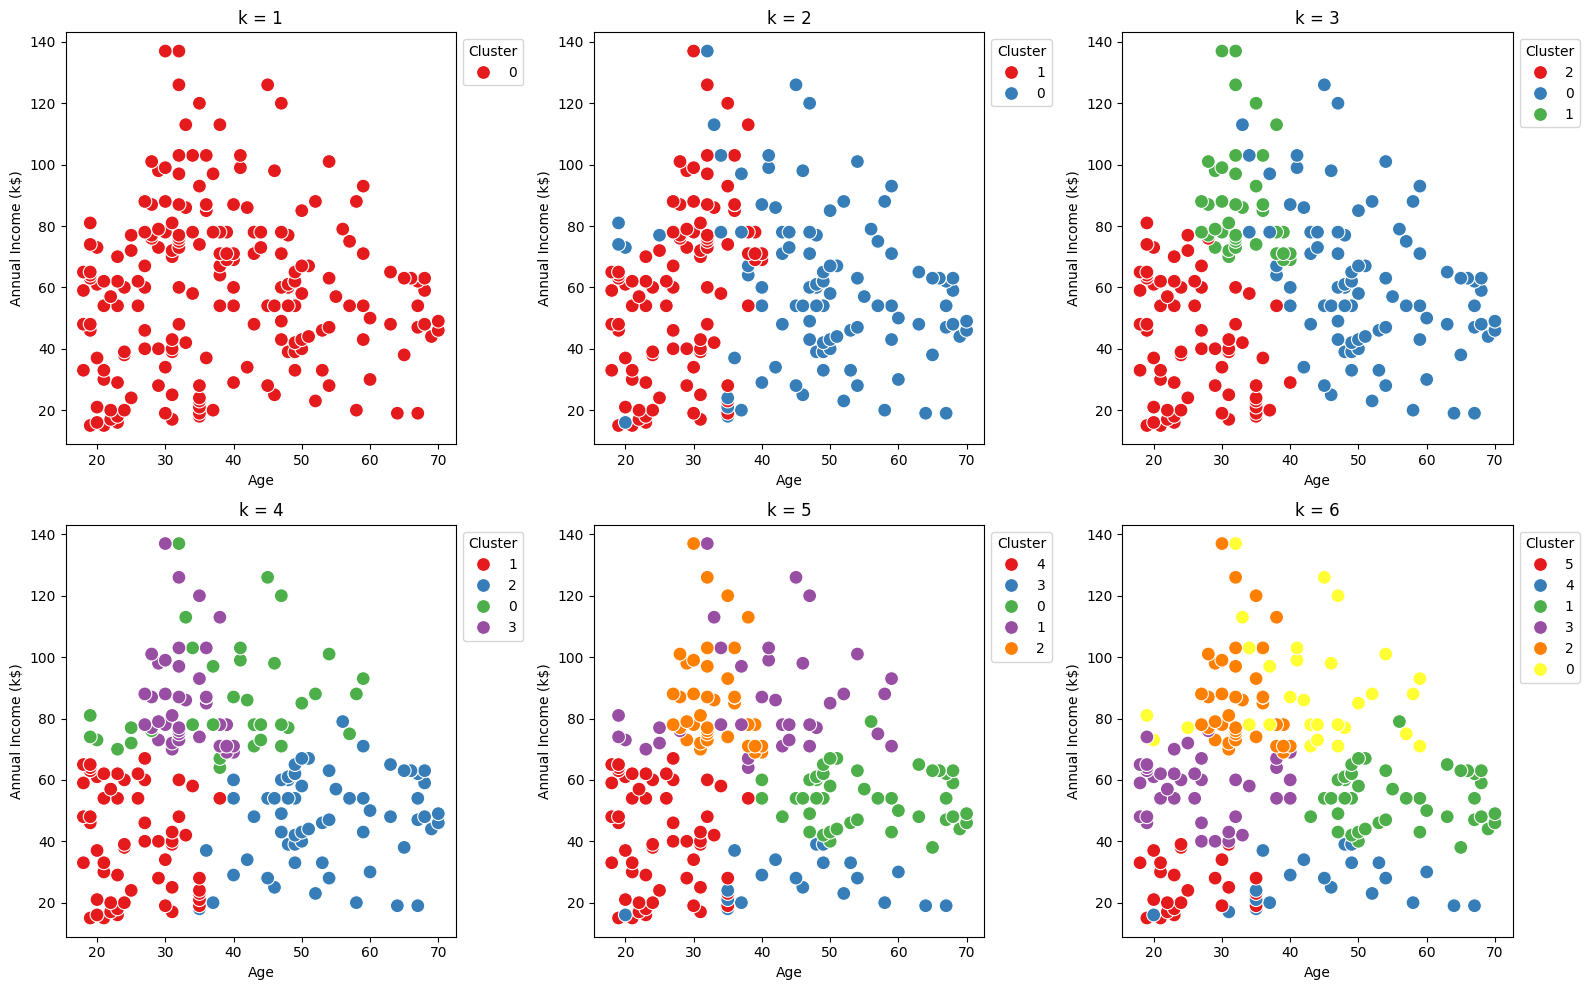

In [ ]:
# Define the number of clusters you want to visualize
num_clusters = 6

# Calculate the number of rows and columns for the grid of plots
rows = (num_clusters + 1) // 3
cols = 3

# Create a grid of subplots
fig, axes = plt.subplots(rows, cols, figsize=(16, 10))


# Loop through each value of k
for k in range(1, num_clusters + 1):
    row = (k - 1) // cols
    col = (k - 1) % cols

    # Apply K-Means with the current value of k
    kmeans = KMeans(n_clusters=k, random_state=0)
    df['Cluster'] = kmeans.fit_predict(df[features])
    df['Cluster'] = df['Cluster'].astype(str)

    # Scatter plot of data points with cluster coloring
    ax = sns.scatterplot(ax=axes[row, col], data=df, s=100, x='Age', y='Annual Income (k$)', hue='Cluster', palette='Set1')

    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

    axes[row, col].set_title(f'k = {k}')

# Adjust layout
plt.tight_layout()
plt.show()

###Annual Income (k$) e	Spending Score (1-100)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

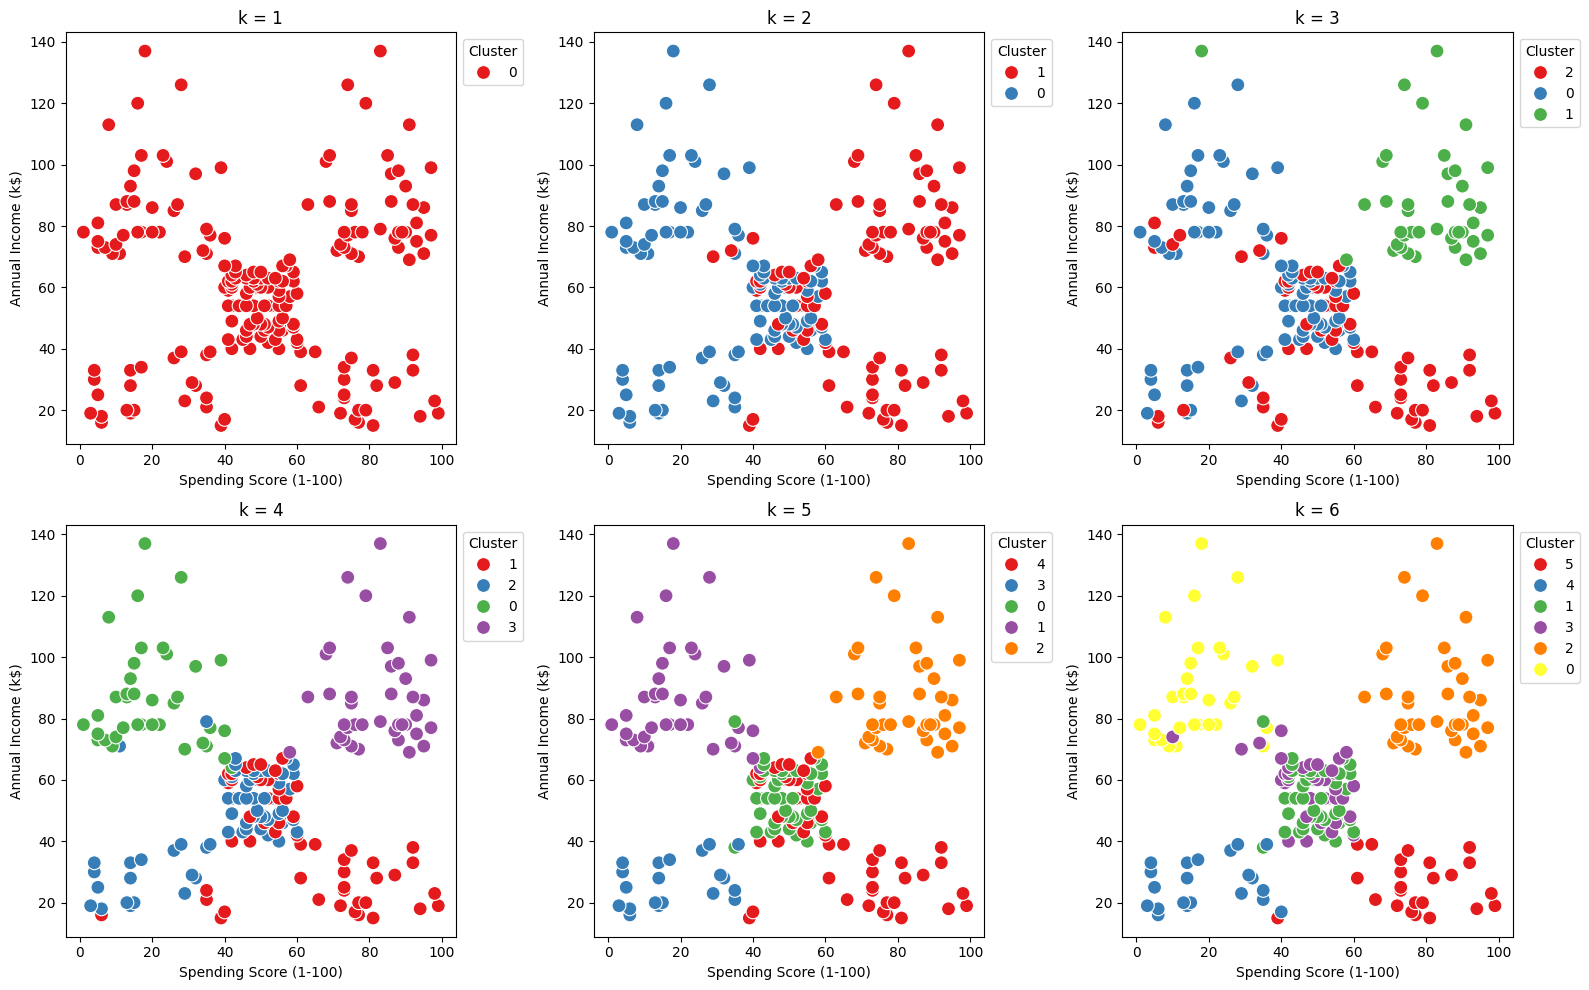

In [ ]:
# Define the number of clusters you want to visualize
num_clusters = 6

# Calculate the number of rows and columns for the grid of plots
rows = (num_clusters + 1) // 3
cols = 3

# Create a grid of subplots
fig, axes = plt.subplots(rows, cols, figsize=(16, 10))


# Loop through each value of k
for k in range(1, num_clusters + 1):
    row = (k - 1) // cols
    col = (k - 1) % cols

    # Apply K-Means with the current value of k
    kmeans = KMeans(n_clusters=k, random_state=0)
    df['Cluster'] = kmeans.fit_predict(df[features])
    df['Cluster'] = df['Cluster'].astype(str)

    # Scatter plot of data points with cluster coloring
    ax = sns.scatterplot(ax=axes[row, col], data=df, s=100, x='Spending Score (1-100)', y='Annual Income (k$)', hue='Cluster', palette='Set1')

    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

    axes[row, col].set_title(f'k = {k}')

# Adjust layout
plt.tight_layout()
plt.show()

###Age e Spending Score (1-100)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

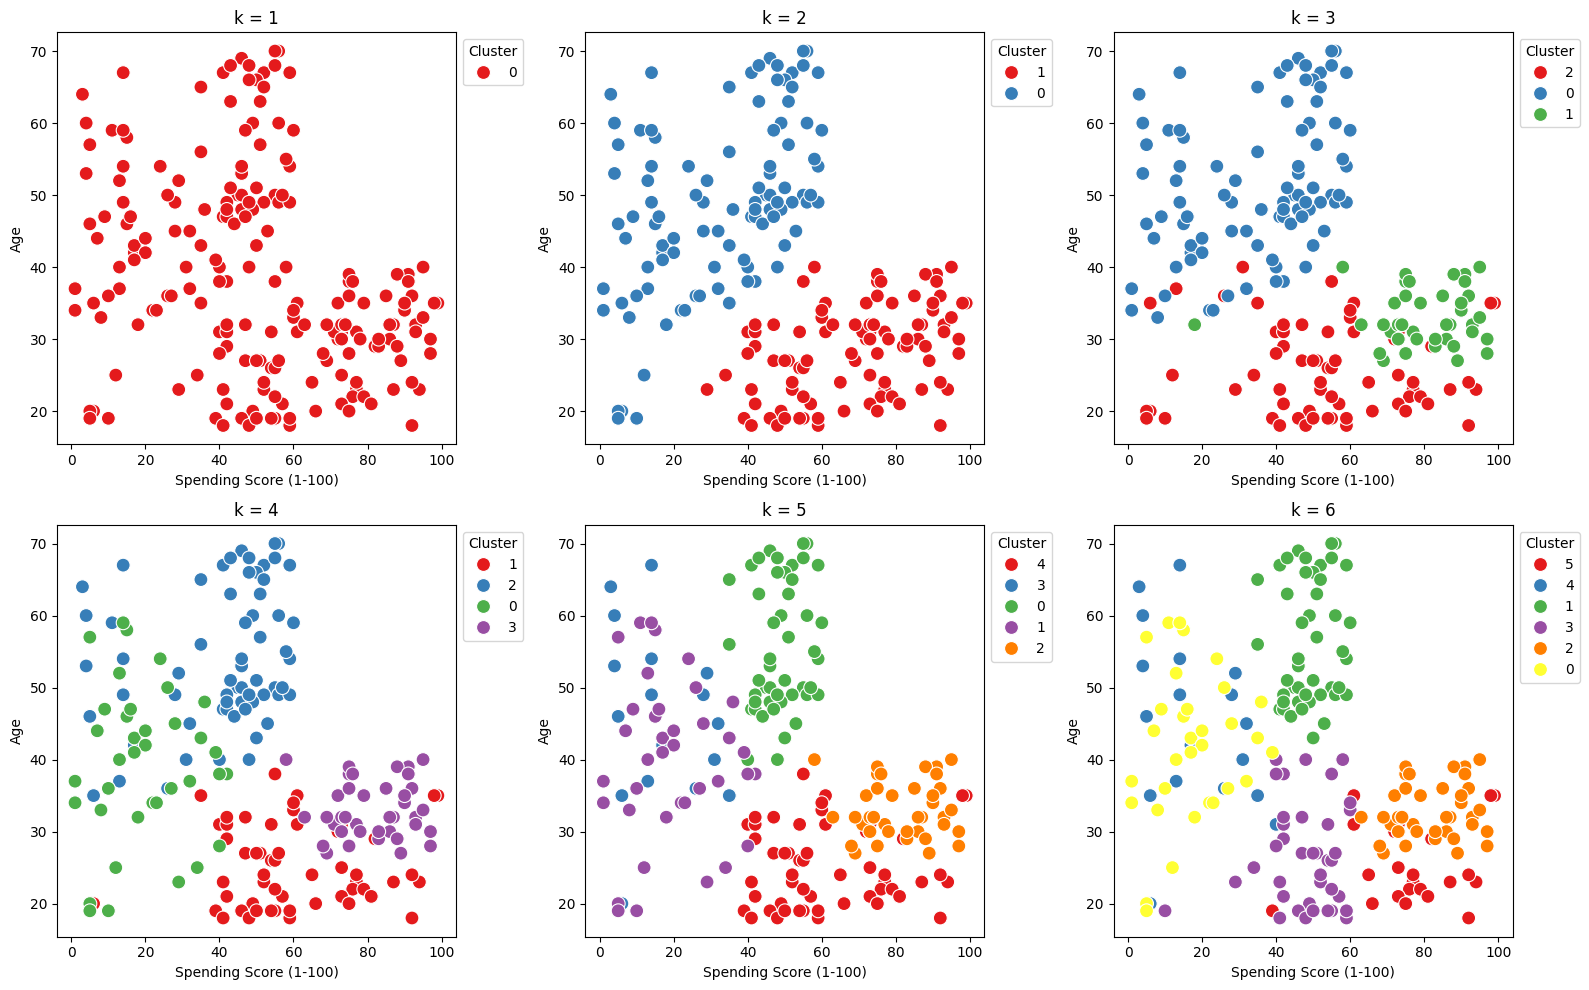

In [ ]:
# Define the number of clusters you want to visualize
num_clusters = 6

# Calculate the number of rows and columns for the grid of plots
rows = (num_clusters + 1) // 3
cols = 3

# Create a grid of subplots
fig, axes = plt.subplots(rows, cols, figsize=(16, 10))


# Loop through each value of k
for k in range(1, num_clusters + 1):
    row = (k - 1) // cols
    col = (k - 1) % cols

    # Apply K-Means with the current value of k
    kmeans = KMeans(n_clusters=k, random_state=0)
    df['Cluster'] = kmeans.fit_predict(df[features])
    df['Cluster'] = df['Cluster'].astype(str)

    # Scatter plot of data points with cluster coloring
    ax = sns.scatterplot(ax=axes[row, col], data=df, s=100, x='Spending Score (1-100)', y='Age', hue='Cluster', palette='Set1')

    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

    axes[row, col].set_title(f'k = {k}')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
df[df['Cluster'] == '3']

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),age_std,income_std,score_std,Cluster
47,48,Female,27,40,47,-0.850435,-0.784763,-0.124229,3
48,49,Female,29,40,42,-0.706902,-0.784763,-0.318337,3
49,50,Female,31,40,42,-0.563369,-0.784763,-0.318337,3
51,52,Male,33,42,60,-0.419835,-0.708425,0.380451,3
52,53,Female,31,43,54,-0.563369,-0.670255,0.147522,3
58,59,Female,27,46,51,-0.850435,-0.555747,0.031057,3
61,62,Male,19,46,55,-1.424569,-0.555747,0.186343,3
65,66,Male,18,48,59,-1.496335,-0.479408,0.341630,3
68,69,Male,19,48,59,-1.424569,-0.479408,0.341630,3
69,70,Female,32,48,47,-0.491602,-0.479408,-0.124229,3


In [ ]:
kmeans.inertia_

133.86833362685582

###Age e Genre

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


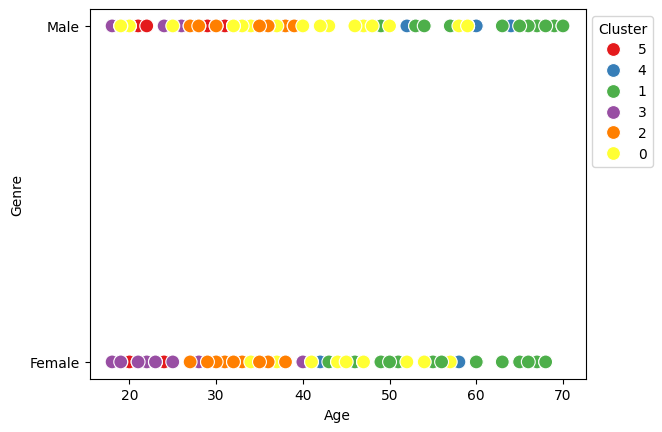

In [ ]:
# Apply K-Means with the current value of k
kmeans = KMeans(n_clusters=6, random_state=0)
df['Cluster'] = kmeans.fit_predict(df[features])
df['Cluster'] = df['Cluster'].astype(str)

# Scatter plot of data points with cluster coloring
ax = sns.scatterplot(data=df, s=100, x='Age', y='Genre', hue='Cluster', palette='Set1')

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))